In [1]:
import sys
sys.path.append("../")

In [2]:
from mir.common.parser import *
from mir.common.repertoire import Repertoire
from mir.common.repertoire_dataset import RepertoireDataset
from mir.common.clonotype_dataset import ClonotypeDataset
from mir.basic.segment_usage import *
from mir.basic.sampling import RepertoireSampling
from mir.biomarkers.fisher_biomarkers_detector import FisherBiomarkersDetector
import time

In [3]:
import importlib
imported_module = importlib.import_module("mir.common.clonotype_dataset")
importlib.reload(imported_module)

<module 'mir.common.clonotype_dataset' from '/home/evlasova/mirpy/notebooks/../mir/common/clonotype_dataset.py'>

In [4]:
metadata = pd.read_csv('assets/samples/fmba_healthy/desc_fmba_beta_healthy_not_nan_hla.csv').drop(columns=['Unnamed: 0'])
metadata

,run,reads,clonotypes,folder,HLA-A.1,HLA-A.2,HLA-B.1,HLA-B.2,HLA-C.1,HLA-C.2,HLA-DPB1.1,HLA-DPB1.2,HLA-DQB1.1,HLA-DQB1.2,HLA-DRB1.1,HLA-DRB1.2,HLA-DRB4.1,HLA-DRB3.1,HLA-DRB5.1
0,020000330101_S185_L002.clonotypes.TRB.txt,4558846,10762,2020/12_FMBA_Novaseq8_DNA,A*02:01,A*02:06,B*37:01,B*51:01,C*02:02,C*06:02,DPB1*03:01,DPB1*04:02,DQB1*03:01,DQB1*06:01,DRB1*08:03,DRB1*11:01,NaN,NaN,NaN
1,020003810808_S104_L002.clonotypes.TRB.txt,3117991,15211,2020/10_FMBA_NovaSeq5,A*01:02,A*31:01,B*07:02,B*15:16,C*07:02,C*14:02,DPB1*02:01,DPB1*04:01,DQB1*02:01,DQB1*06:02,DRB1*03:01,DRB1*15:01,NaN,NaN,NaN
2,020003840808_S118_L002.clonotypes.TRB.txt,1894167,8435,2020/10_FMBA_NovaSeq5,A*01:01,A*02:01,B*13:02,B*44:02,C*06:02,C*07:04,DPB1*03:01,DPB1*17:01,DQB1*02:02,DQB1*06:02,DRB1*07:01,DRB1*15:01,NaN,NaN,NaN
3,050000310808_S83_L001.clonotypes.TRB.txt,1407629,16454,2020/12_FMBA_Novaseq7_DNA,A*02:01,A*02:01,B*13:02,B*51:01,C*06:02,C*07:02,DPB1*04:01,DPB1*05:01,DQB1*02:02,DQB1*03:02,DRB1*04:03,DRB1*07:01,NaN,NaN,NaN
4,050000550101_S84_L001.clonotypes.TRB.txt,4039131,31101,2020/12_FMBA_Novaseq8_DNA,A*02:01,A*02:01,B*50:01,B*51:01,C*03:03,C*08:03,DPB1*04:01,DPB1*05:01,DQB1*02:02,DQB1*03:03,DRB1*07:01,DRB1*09:01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,780003220808_S28_L001.clonotypes.TRB.txt,4494229,5699,2020/10_FMBA_NovaSeq4,A*01:01,A*02:01,B*38:01,B*56:01,C*01:02,C*12:03,DPB1*04:01,DPB1*04:01,DQB1*02:01,DQB1*06:03,DRB1*03:01,DRB1*13:01,NaN,NaN,NaN
79,780003440101_S87_L001.clonotypes.TRB.txt,2847425,17997,2020/12_FMBA_Novaseq8_DNA,A*02:01,A*30:01,B*13:02,B*41:02,C*06:02,C*17:03,DPB1*02:01,DPB1*04:01,DQB1*02:02,DQB1*03:01,DRB1*07:01,DRB1*11:01,NaN,NaN,NaN
80,780003510808_S92_L001.clonotypes.TRB.txt,567555,3645,2020/10_FMBA_NovaSeq4,A*25:01,A*26:01,B*07:02,B*57:01,C*06:02,C*07:02,DPB1*04:01,DPB1*11:01,DQB1*02:02,DQB1*03:03,DRB1*07:01,DRB1*07:01,NaN,NaN,NaN
81,780003930808_S76_L001.clonotypes.TRB.txt,224067,3609,2020/10_FMBA_NovaSeq4,A*03:01,A*26:01,B*18:01,B*35:01,C*04:01,C*07:01,DPB1*04:01,DPB1*04:02,DQB1*03:01,DQB1*05:01,DRB1*01:01,DRB1*11:04,NaN,NaN,NaN


In [6]:
t0 = time.time()
dataset = RepertoireDataset.load(parser=VDJtoolsParser(sep=','), 
                                 metadata=metadata,
                                 threads=28,
                                 n=1000,
                                 paths=[f'assets/samples/fmba_healthy/{r["run"]}.gz' for _, r in metadata.iterrows()])
print(time.time() - t0)

68325
3.629012107849121


In [7]:
folder_to_run_mapping = {}
for folder in dataset.metadata[['run', 'folder']].folder.unique():
    folder_to_run_mapping[folder] = set(dataset.metadata[dataset.metadata.folder == folder].run)

In [8]:
z_score_usage_table_v = StandardizedSegmentUsageTable.load_from_repertoire_dataset(
    repertoire_dataset=dataset, 
    gene='TRB', 
    segment_type='V', 
    group_mapping=folder_to_run_mapping, 
    standardization_method='log_exp')
z_score_usage_table_j = StandardizedSegmentUsageTable.load_from_repertoire_dataset(
    repertoire_dataset=dataset, 
    gene='TRB', 
    segment_type='J', 
    group_mapping=folder_to_run_mapping, 
    standardization_method='log_exp')

In [9]:
t0 = time.time()
dataset = dataset.resample(updated_segment_usage_tables=[z_score_usage_table_v, z_score_usage_table_j], 
                                    threads=28)
print(time.time() - t0)

68309
13.609756469726562


In [13]:
dataset

There are 83 repertoires in the dataset
                                         run    reads  clonotypes  \
0  020000330101_S185_L002.clonotypes.TRB.txt  4558846       10762   
1  020003810808_S104_L002.clonotypes.TRB.txt  3117991       15211   
2  020003840808_S118_L002.clonotypes.TRB.txt  1894167        8435   
3   050000310808_S83_L001.clonotypes.TRB.txt  1407629       16454   
4   050000550101_S84_L001.clonotypes.TRB.txt  4039131       31101   

                      folder  HLA-A.1  HLA-A.2  HLA-B.1  HLA-B.2  HLA-C.1  \
0  2020/12_FMBA_Novaseq8_DNA  A*02:01  A*02:06  B*37:01  B*51:01  C*02:02   
1      2020/10_FMBA_NovaSeq5  A*01:02  A*31:01  B*07:02  B*15:16  C*07:02   
2      2020/10_FMBA_NovaSeq5  A*01:01  A*02:01  B*13:02  B*44:02  C*06:02   
3  2020/12_FMBA_Novaseq7_DNA  A*02:01  A*02:01  B*13:02  B*51:01  C*06:02   
4  2020/12_FMBA_Novaseq8_DNA  A*02:01  A*02:01  B*50:01  B*51:01  C*03:03   

   HLA-C.2  HLA-DPB1.1  HLA-DPB1.2  HLA-DQB1.1  HLA-DQB1.2  HLA-DRB1.1  \
0  C*06:

In [10]:
a02_pos_rd, a02_neg_rd = dataset.split_by_metadata_function(
        splitting_method=lambda x: ('A*02' in x['HLA-A.1']) | ('A*02' in x['HLA-A.2'])
    )

38648
29661


In [11]:
a02_pos_rd

There are 47 repertoires in the dataset
                                         run    reads  clonotypes  \
0  020000330101_S185_L002.clonotypes.TRB.txt  4558846       10762   
1  020003840808_S118_L002.clonotypes.TRB.txt  1894167        8435   
2   050000310808_S83_L001.clonotypes.TRB.txt  1407629       16454   
3   050000550101_S84_L001.clonotypes.TRB.txt  4039131       31101   
4   050000740101_S76_L001.clonotypes.TRB.txt  4541635       20570   

                      folder  HLA-A.1  HLA-A.2  HLA-B.1  HLA-B.2  HLA-C.1  \
0  2020/12_FMBA_Novaseq8_DNA  A*02:01  A*02:06  B*37:01  B*51:01  C*02:02   
1      2020/10_FMBA_NovaSeq5  A*01:01  A*02:01  B*13:02  B*44:02  C*06:02   
2  2020/12_FMBA_Novaseq7_DNA  A*02:01  A*02:01  B*13:02  B*51:01  C*06:02   
3  2020/12_FMBA_Novaseq8_DNA  A*02:01  A*02:01  B*50:01  B*51:01  C*03:03   
4  2020/12_FMBA_Novaseq8_DNA  A*02:01  A*03:01  B*27:05  B*35:01  C*01:02   

   HLA-C.2  HLA-DPB1.1  HLA-DPB1.2  HLA-DQB1.1  HLA-DQB1.2  HLA-DRB1.1  \
0  C*06:

In [12]:
a02_neg_rd

There are 36 repertoires in the dataset
                                         run    reads  clonotypes  \
0  020003810808_S104_L002.clonotypes.TRB.txt  3117991       15211   
1  210001740808_S153_L002.clonotypes.TRB.txt  7783196       14797   
2   210002270101_S70_L001.clonotypes.TRB.txt  4197826       29344   
3   210003070808_S84_L001.clonotypes.TRB.txt  4902255       12855   
4   270000130807_S31_L001.clonotypes.TRB.txt  7782061       22626   

                      folder  HLA-A.1  HLA-A.2  HLA-B.1  HLA-B.2  HLA-C.1  \
0      2020/10_FMBA_NovaSeq5  A*01:02  A*31:01  B*07:02  B*15:16  C*07:02   
1      2020/10_FMBA_NovaSeq4  A*29:02  A*30:01  B*13:02  B*51:08  C*06:02   
2  2020/12_FMBA_Novaseq8_DNA  A*03:01  A*03:01  B*35:01  B*40:02  C*03:03   
3      2020/10_FMBA_NovaSeq4  A*24:02  A*26:01  B*27:14  B*35:02  C*01:02   
4      2020/10_FMBA_NovaSeq6  A*01:01  A*30:01  B*08:01  B*13:02  C*06:02   

   HLA-C.2  HLA-DPB1.1  HLA-DPB1.2  HLA-DQB1.1  HLA-DQB1.2  HLA-DRB1.1  \
0  C*14:

In [12]:
fbd = FisherBiomarkersDetector(control_repertoire_dataset=a02_pos_rd,
                               ill_repertoire_dataset=a02_neg_rd, 
                               adjusted_p_value=0.05, 
                               threads=28)

In [13]:
t0 = time.time()
biomarkers = fbd.detect_biomarkers(adjusted_p_value=0.0005)
print(time.time() - t0)

1006120
there are 73997 public clonotypes
processed 0 clonotypes
processed 5000 clonotypes
processed 10000 clonotypes
processed 15000 clonotypes
processed 20000 clonotypes
processed 25000 clonotypes
processed 30000 clonotypes
processed 35000 clonotypes
processed 40000 clonotypes
processed 45000 clonotypes
processed 50000 clonotypes
processed 55000 clonotypes
processed 60000 clonotypes
processed 65000 clonotypes
processed 70000 clonotypes
finished testing
1918.2590763568878


In [14]:
cd = ClonotypeDataset(clonotypes=[ClonotypeAA(cdr3aa=x) for x in biomarkers])

In [15]:
cd

A dataset of 7719 clonotypes and 1661 clusters

In [16]:
cd.clonotype_clustering

,cdr3aa,cluster
vertex ID,,
0,CASSSGPNNEQFF,0
1,CASSSGPYNEQFF,0
2,CASSAGPNNEQFF,0
3,CASSLRTGSSYEQYF,1
4,CASSLGTGSSYEQYF,1
...,...,...
7714,CASRDRGSYEQYF,12
7715,CASSRQGGRTEAFF,1658
7716,CASSLAQGANTEAFF,1659


In [17]:
cd.clonotype_clustering.cluster.value_counts()

cluster
15      481
6       437
10      289
13      282
24      278
       ... 
1606      1
1607      1
1608      1
1609      1
1610      1
Name: count, Length: 1661, dtype: int64

/home/evlasova/mirpy/notebooks/../mir/common/clonotype_dataset.py:153: UserWarning: 
The palette list has fewer values (100) than needed (692) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(plotting_df[plotting_df.cluster_size > 1], x='x', y='y', hue=color_by,


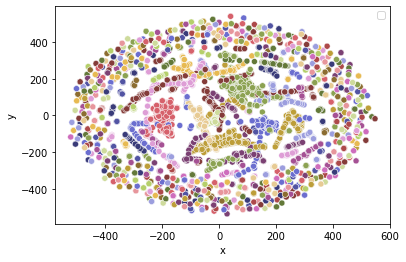

In [18]:
fig, ax = plt.subplots()
cd.plot_clonotype_clustering(color_by='cluster', ax=ax, plot_unclustered=False)
ax.legend([])